# Maryland Traffic Violation Analysis

## Summer 2024 Data Science Project

Abebaw Tereda, Oscar Javier Soto,  and Geremew Belew


# Introduction

The analysis of traffic violations in Maryland is essential for understanding the region's traffic-related incidents. This dataset, sourced from Kaggle, helps us identify common traffic violations and their frequencies, analyze temporal patterns, including peak times and seasonal variations, examine geographic distribution across different areas, and explore demographic factors, such as race and gender, to understand their influence on traffic violation trends.

This dataset provides detailed information on each traffic violation, including the date and time of the incident, location, description of the violation, and demographic details of the individuals involved. This detailed data enables us to analyze the temporal and spatial distribution of traffic violations and examine potential correlations with demographic variables.

Understanding the dynamics of traffic violations is crucial for developing targeted interventions to improve road safety and reduce traffic-related incidents. Insights from this analysis can inform policymakers, law enforcement agencies, and community stakeholders, enabling them to implement data-driven strategies to enhance traffic management and public safety.

Our analysis will use various statistical and data visualization techniques to understand patterns and relationships within the dataset. We will use Pandas for data manipulation, Matplotlib for visualization, and machine learning algorithms to predict trends and identify high-risk factors associated with traffic violations.

# Data Curation

The dataset used in this analysis is sourced from Kaggle: [Traffic Violations in Maryland County](https://www.kaggle.com/datasets/rounak041993/traffic-violations-in-maryland-county). 

The dataset includes detailed information on each traffic violation, such as the date and time of the incident, location, description of the violation, and demographic details of the individuals involved. This helps us analyze traffic violation's temporal and spatial distribution and examine potential correlations with demographic variables.

## Data preprocessing

### Loading and understanding the Dataset

First, we import the necessary libraries and load the dataset into a Pandas DataFrame. Pandas is a powerful data manipulation library in Python that simplifies data handling and preparation.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import zscore, chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Load Traffic_Violations.csv dataset into traf_df dataframe and display the dataframe.

In [2]:
#Display the dataframe after loading the csv file
traf_df = pd.read_csv("Traffic_Violations.csv")
traf_df.head()

/tmp/ipykernel_119392/3974075732.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  traf_df = pd.read_csv("Traffic_Violations.csv")


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


Display column types.

In [3]:
#Display the column list
traf_df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

The data include items, such as:


- Date Of Stop : Date of the traffic violation.
- Time Of Stop : Time of the traffic violation.
- Agency : Agency issuing the traffic violation. (Example: MCP is Montgomery County Police)
-  SubAgency : Court code representing the district of assignment of the officer. R15 = 1st district, Rockville B15 = 2nd
district, Bethesda SS15 = 3rd district, Silver Spring WG15 = 4th district, Wheaton G15 = 5th district, Germantown M15 = 6th district, Gaithersburg / Montgomery Village HQ15 = Headquarters and Special Operations
- Description : Text description of the specific charge.
- Location : Location of the violation, usually an address or intersection.
- Latitude : Latitude location of the traffic violation.
- Longitude : Longitude location of the traffic violation.
- Accident : If traffic violation involved an accident.
- Belts : If traffic violation involved a seat belt violation.
- Personal Injury : If traffic violation involved Personal Injury.
- Property Damage : If traffic violation involved Property Damage.
- Fatal : If traffic violation involved a fatality.
- Commercial License : If driver holds a Commercial Drivers License.
- HAZMAT : If the traffic violation involved hazardous materials.
- Commercial Vehicle : If the vehicle committing the traffic violation is a commercial vehicle.
- Alcohol : If the traffic violation included an alcohol related
- Work Zone : If the traffic violation was in a work zone.
- State : State issuing the vehicle registration.
- VehicleType : Type of vehicle (Examples: Automobile, Station Wagon, Heavy Duty Truck, etc.)
- Year : Year vehicle was made
- Make : Manufacturer of the vehicle (Examples: Ford, Chevy, Honda, Toyota, etc.)
- Model : Model of the vehicle.
- Color : Color of the vehicle.
- Violation Type : Violation type. (Examples: Warning, Citation, SERO)
- Charge : Numeric code for the specific charge.
- Article : Article of State Law. (TA = Transportation Article, MR = Maryland Rules)
- Contributed To Accident : If the traffic violation was a contributing factor in an accident.
- Race : Race of the driver. (Example: Asian, Black, White, Other, etc.)
- Gender : Gender of the driver (F = Female, M = Male)
- Driver City : City of the driver’s home address.
- Driver State : State of the driver’s home address.
- DL State : State issuing the Driver’s License.
- Arrest Type : Type of Arrest (A = Marked, B = Unmarked, etc.)
- Geolocation : Geo-coded location information.

In this step, we inspect the data types of each column in the original dataset. Understanding the data types is crucial because it helps us identify which columns need type conversion or further preprocessing. For instance, date and time columns should be converted to datetime objects, and categorical variables might need to be converted to numerical formats for analysis. By examining the data types, we ensure that the data is in the correct format for subsequent analysis and manipulation.

In [4]:
#Display the datatype the original dataset
traf_df.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Article                     object
Contributed To Accident     object
Race                

To understand the size and structure of our dataset, we check the number of rows and columns. This information provides an overview of the dataset's dimensions and helps in assessing the volume of data we are working with. Knowing the number of rows and columns is also useful for later steps in data analysis, such as memory management and performance optimization.

In [5]:
#Display the number of rows and columns
number_of_rows, number_of_columns = traf_df.shape
print("Number of rows: ", number_of_rows)
print("Number of columns: ", number_of_columns)

Number of rows:  1292399
Number of columns:  35


To ensure the quality and completeness of our dataset, we need to identify columns with missing values. By using the count function, we can determine the number of non-null entries in each column. Comparing these counts with the total number of rows in the dataset helps us pinpoint columns that contain missing data. Identifying these columns is the first step in handling missing values, which is crucial for accurate data analysis and modeling.

In [6]:
#Use a count function to identify which row has a missing value
traf_df.count()

Date Of Stop               1292399
Time Of Stop               1292399
Agency                     1292399
SubAgency                  1292389
Description                1292390
Location                   1292397
Latitude                   1197045
Longitude                  1197045
Accident                   1292399
Belts                      1292399
Personal Injury            1292399
Property Damage            1292399
Fatal                      1292399
Commercial License         1292399
HAZMAT                     1292399
Commercial Vehicle         1292399
Alcohol                    1292399
Work Zone                  1292399
State                      1292340
VehicleType                1292399
Year                       1284325
Make                       1292342
Model                      1292212
Color                      1276272
Violation Type             1292399
Charge                     1292399
Article                    1227230
Contributed To Accident    1292399
Race                

To ensure the integrity and uniqueness of our dataset, we need to check for duplicate entries. Duplicate rows can distort analysis results and lead to incorrect conclusions. By using the `duplicated()` function, we can identify rows that are exact duplicates of others. This step helps us maintain a clean dataset by identifying and removing redundant data points.

In [7]:
duplicate_rows = traf_df.duplicated()
print("Duplicate entries: ", traf_df[duplicate_rows].shape[0])

Duplicate entries:  1588


In this step, we identify which columns have missing values and how many missing values each column contains. This information is essential for understanding the completeness of our dataset. By using the `isnull().sum()` function, we can quickly see the number of missing entries in each column. This helps us decide how to handle these missing values, whether by removing rows, filling in missing values, or using other imputation methods.

In [8]:
# Check which columns have a missing vlaue
missing_values_count = traf_df.isnull().sum()
missing_values_count

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                     10
Description                    9
Location                       2
Latitude                   95354
Longitude                  95354
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        8074
Make                          57
Model                        187
Color                      16127
Violation Type                 0
Charge                         0
Article                    65169
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

### Data Cleanning 

Before diving into exploratory data analysis (EDA), As you can see above we found so many problems on our dataset, so it's crucial to clean and preprocess the dataset to ensure the data is in the correct format and free from inconsistencies. 


We found duplicate rows in the dataset, which can arise from data entry errors or repeated data collection(Since we did not gathered this data by ourselves, we do not know where those come from ). These duplicates can skew our analysis by over-representing certain data points, so we removed these duplicate rows to ensure that each record is unique. For example, if a single violation was recorded multiple times, it could falsely indicate a higher incidence of that type of violation, leading to inaccurate conclusions.


In [9]:
# Remove the duplicate rows
traf_df = traf_df.drop_duplicates()


Additionally, there were many missing values in the dataset. Missing values can interfere with our statistical calculations and data analysis processes. By removing rows with missing values, we ensure that the dataset is complete and ready for accurate analysis, maintaining the integrity of our statistical calculations. For instance, if certain rows lack information about the violation type or driver's race, including these incomplete rows could lead to misleading results.

In [10]:
# Remove the missing values
traf_df = traf_df.dropna()


We changed the types of some of the feature.  For instance, the "Date Of Stop" and "Time Of Stop" columns were initially given as strings. We converted these columns to datetime format, which allows us to extract meaningful insights such as the year, month, day, and hour of the traffic stop. This conversion is crucial for temporal analysis, we can analyze peak traffic stop times,  enabling us to identify trends and patterns over time.

We also changed the "Year"(Year of the Vehicle) column to integer type. Ensuring that the "Year" column is in integer format allows for numerical operations and comparisons, such as sorting, filtering, and performing statistical analyses. For example, comparing violation rates across different vehicle's year requires the "Year" column to be numeric.


In [11]:
# Convert the data type of date to datetime type
traf_df['Date Of Stop'] = pd.to_datetime(traf_df['Date Of Stop'], format='%m/%d/%Y', dayfirst=True)

# change the data type of time to datetime
traf_df['Time Of Stop'] = pd.to_datetime(traf_df['Time Of Stop'], format="%H:%M:%S")

traf_df['Year'] = traf_df['Year'].astype('int32')

# Check the updates so far
traf_df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
1,2017-08-29,1900-01-01 10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,2014-12-01,1900-01-01 12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,2017-08-29,1900-01-01 09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
6,2013-10-08,1900-01-01 13:23:00,MCP,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,No,...,13-401(h),Transportation Article,No,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol,"(39.0933833333333, -77.0795516666667)"
10,2014-02-14,1900-01-01 20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,...,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"



We want to drop a certain columns, like "Geolocation," "Agency," "Article," "Color," and "Accident," were dropped from the dataset. These columns contain information not directly relevant to our analysis. For instance the Geolocation was repeated because the Longitude and Latitude columns were given already, and accident column has only one type of value which is not helpful for our analysis and the color of the car does not have any role for our analysis.  

We also converted categorical variables with 'Yes'/'No' values into binary numeric values (1 for 'Yes', 0 for 'No'). This step, known as one-hot encoding, allows us to use these variables in mathematical operations and machine learning algorithms. For example, encoding the "Alcohol", "Work Zone" column as 1 and 0 enables us to analyze the impact of alcohol involvement on the type of violation efficiently.

In [12]:
# Drop unnecessary feature for our analysis
traf_df.drop(['Geolocation', 'Agency', 'Article', 'Color','Accident'], axis='columns', inplace=True)

In [13]:
# Change the value 'Yes' into 1 and 'No' into 0 for some features (One-hot Encoding)
traf_df['Belts'] = traf_df['Belts'].map({'Yes': 1, 'No': 0})
traf_df['Personal Injury'] = traf_df['Personal Injury'].map({'Yes': 1, 'No': 0})
traf_df['Property Damage'] = traf_df['Property Damage'].map({'Yes': 1, 'No': 0})
traf_df['Commercial License'] = traf_df['Commercial License'].map({'Yes': 1, 'No': 0})
traf_df['Commercial Vehicle'] = traf_df['Commercial Vehicle'].map({'Yes': 1, 'No': 0})
traf_df['Alcohol'] = traf_df['Alcohol'].map({'Yes': 1, 'No': 0})
traf_df['Work Zone'] = traf_df['Work Zone'].map({'Yes': 1, 'No': 0})
traf_df['HAZMAT'] = traf_df['HAZMAT'].map({'Yes': 1, 'No': 0})
traf_df['Fatal'] = traf_df['Fatal'].map({'Yes': 1, 'No': 0})
traf_df['Contributed To Accident'] = traf_df['Contributed To Accident'].map({'Yes': 1, 'No': 0})

# Now Check the cleaned dataframe
traf_df

,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,...,Model,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
1,2017-08-29,1900-01-01 10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,0,0,0,...,COROLLA,Citation,21-201(a1),0,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol
2,2014-12-01,1900-01-01 12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,0,0,1,...,ACCORD,Citation,21-403(b),0,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol
3,2017-08-29,1900-01-01 09:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,0,0,1,...,DAKOTA,Citation,21-402(b),0,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol
6,2013-10-08,1900-01-01 13:23:00,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,0,0,0,...,PICKUP,Citation,13-401(h),0,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol
10,2014-02-14,1900-01-01 20:10:00,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,0,0,0,...,STS,Citation,21-311(1),0,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291736,2012-11-12,1900-01-01 09:40:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,CLOPPER ROAD AT ORCHARD RIDGE DRIVE,39.147593,-77.234835,0,0,0,...,SABLE,Warning,21-801.1,0,BLACK,F,GERMANTOWN,MD,MD,A - Marked Patrol
1291737,2012-11-12,1900-01-01 09:51:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,CLOPPER ROAD AT ORCHARD RIDGE DRIVE,39.147572,-77.234841,0,0,0,...,ECLIPSE,Warning,21-801.1,0,WHITE,M,GERMANTOWN,MD,MD,Q - Marked Laser
1291738,2012-11-12,1900-01-01 10:21:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,FREDERICK AVE AT PROFESSIONAL DR,39.162809,-77.225643,0,0,0,...,CIICIC,Warning,21-801.1,0,ASIAN,F,FREDERICK,MD,MD,Q - Marked Laser
1291739,2012-11-12,1900-01-01 10:34:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,FREDERICK AVE AT PROFESSIONAL DR,39.161533,-77.223629,0,0,0,...,COOPER,Warning,21-801.1,0,WHITE,M,DAMASCUS,MD,MD,Q - Marked Laser


# Exploratory data analysis And Visulization 

In our analysis of the Maryland Traffic Violations dataset, we will explore several hypotheses that may influence the type of violation (Citation vs. Warning). Our focus will be on demographic anlysis within the dataset. Our hypotheses is whether there is a significant difference in the likelihood of receiving a citation versus a warning based on the driver's race. By analyzing the "Race" column, we can assess if certain racial groups are disproportionately receiving citations compared to warnings. This analysis is crucial for identifying any racial disparities in traffic enforcement practices. However, given the richness of the dataset, we recognize the importance of examining other relevant features that might impact on the type of violation. When we come up with this idea, we raise so many question on other features how they have impact on our anlysis, for exxample; time, gender, geographic location, driver's characteristics, vehicle characteristics, and cncident Characteristics. 

- Whether certain times of the day are more likely to result in citations versus warnings. This analysis will involve examining the "Time of Stop" column to identify peak hours for traffic stops and assessing whether these peak times correspond to higher incidences of citations or warnings. Understanding the time-of-day patterns can help us identify any time-specific enforcement biases or trends in driver behavior.
- Similarly, we will explore whether the gender of the driver influences the type of violation received. The "Gender" column will be examined to determine if there are any noticeable differences in citation and warning rates between male and female drivers. This analysis will help us understand if gender plays a role in traffic enforcement decisions.
-The location of the traffic stop, captured in the "Driver City" and "Sub Agency"column, could play a significant role in the type of violation issued. We will analyze whether certain areas or locations are associated with higher rates of citations versus warnings. This geographic analysis can help identify hotspots for traffic violations and potential location-based enforcement practices.

- Beyond race and gender, other characteristics of the driver may also influence the type of violation. For instance,  columns related to driver's behavior (such as "Alcohol" or  drving in "Working Zone"), we can analyze whether drivers under the influence are more likely to receive citations compared to warnings. This can provide insights into how driver behavior impacts enforcement decisions.

- The type and characteristics of the vehicle involved in the traffic stop may also be relevant. Columns such as "Make", "Model", and "Year" of the vehicle can be analyzed to determine if certain vehicle types are more prone to citations or warnings. This analysis can help us understand if there are any biases related to the type of vehicle driven.

- Details about the incident itself, such as the "Description" of the violation, can provide context for understanding why certain violations result in citations while others result in warnings. By analyzing the descriptions and categorizing the types of violations, we can identify patterns in enforcement based on the severity or nature of the violation.

In [14]:
categorical_summary = traf_df.describe(include=[object])
categorical_summary

,SubAgency,Description,Location,State,VehicleType,Make,Model,Violation Type,Charge,Race,Gender,Driver City,Driver State,DL State,Arrest Type
count,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016,1119016
unique,7,11653,167471,69,32,3299,16125,3,943,6,3,6870,67,70,19
top,"4th district, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,IS 370 @ IS 270,MD,02 - Automobile,TOYOTA,4S,Warning,21-801.1,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol
freq,285582,95013,1957,978219,987126,127787,123264,577392,153476,405636,746578,278652,1006703,969879,912452


we used the describe() function in pandas. This function provides a summary of statistics for each column, offering valuable insights into the distribution and diversity of values within our dataset. Here's an interpretation of the output for categorical data:

- Count-This represents the total number of non-null entries in each column. It helps us understand the completeness of our dataset by showing how many valid data points we have for each feature. As you can see in the output, there are no missing values in each feature. 

- Unique- This shows the number of distinct values in each column. It gives us a sense of the variety within the data. For example, knowing the number of unique sub-agencies, locations, or vehicle types helps us understand the diversity of the dataset.

- Top- This indicates the most frequently occurring value in each column, essentially the mode. This information highlights the most common characteristics within the dataset, such as the most common violation type, race, or gender.

- Freq: This provides the frequency of the most common value. It shows how dominant the top value is in the dataset. For instance, if the most common violation type occurs very frequently, it suggests a potential focus area for traffic enforcement.

The "SubAgency" column has a certain number of unique sub-agencies, with the most common sub-agency appearing frequently.

The "Description" column shows a variety of violation descriptions, with one specific type of violation being the most common.

The "Location" column indicates numerous unique locations where violations occur, with a particular location having the highest frequency of violations.

The "State", "VehicleType", "Make", and "Model" columns reveal diverse entries, with specific states, vehicle types, makes, and models appearing more 
frequently.

The "Violation Type" column shows the distribution between citations and warnings, highlighting which type is more common.

The "Charge", "Race", "Gender", "Driver City", "Driver State", "DL State", and "Arrest Type" columns provide insights into the most common charges, races, genders, driver cities, states, and arrest types.

#### Now let's see the distribution of violation type it will help us for further investgation. 

In [15]:
traf_df['Violation Type'].value_counts()

Warning     577392
Citation    541601
SERO            23
Name: Violation Type, dtype: int64

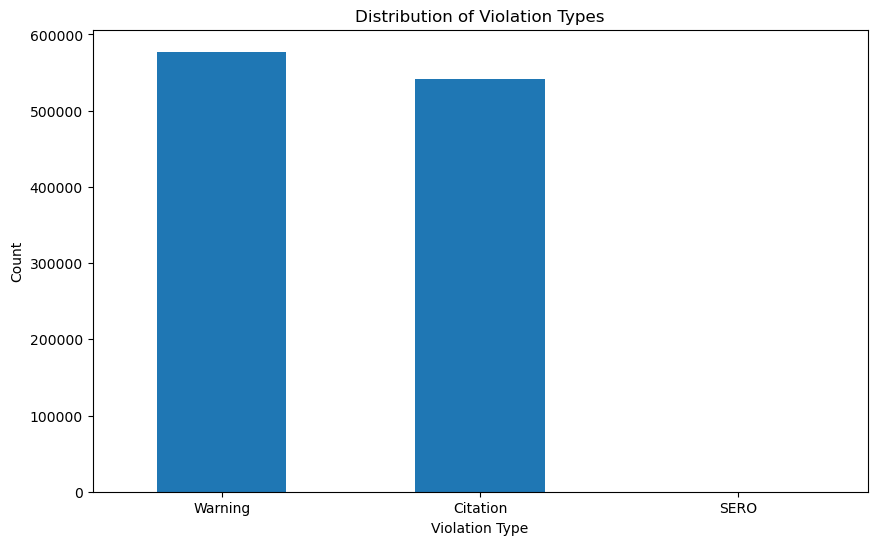

In [16]:
plt.figure(figsize=(10, 6))
traf_df['Violation Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Violation Types')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

We considered the "SERO" violation type as an outlier. As you can see, it is insignificant in terms of quantity compared to "Warning" and "Citation" types:

Warning: 577,392 instances
Citation: 541,601 instances
SERO: 23 instances
Given the extremely low frequency of "SERO", it does not provide substantial information for our analysis and could potentially skew the results. Therefore, we decided to remove "SERO" entries from the dataset to focus on the more relevant violation types.

In [17]:
traf_df = traf_df[traf_df['Violation Type'] != 'SERO']

Now let's dive into our main hypothesis to understand the race distribution for each violation type. By examining the "Race" column, we aim to uncover any significant differences in the likelihood of receiving a citation versus a warning based on the driver's race.

In [18]:
race_violation_counts = traf_df.groupby('Race')['Violation Type'].value_counts().unstack(fill_value=0)
print(race_violation_counts)

Violation Type   Citation  Warning
Race                              
ASIAN               26838    38876
BLACK              175876   176953
HISPANIC           129647   101815
NATIVE AMERICAN      1165     1450
OTHER               25700    35042
WHITE              182375   223256


<Figure size 1400x800 with 0 Axes>

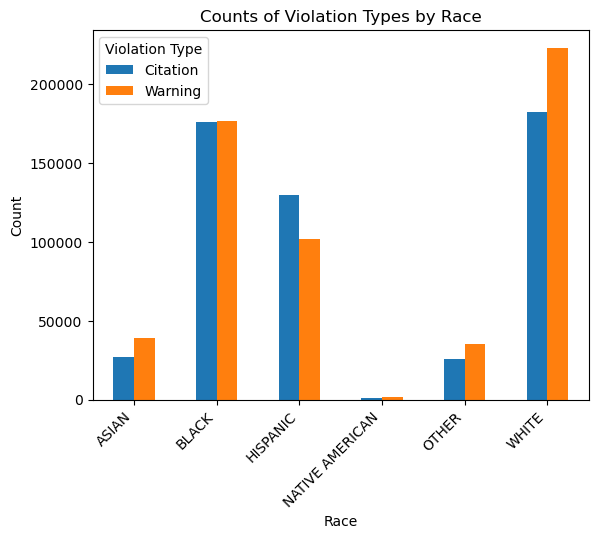

In [19]:
plt.figure(figsize=(14, 8))
race_violation_counts.plot(kind='bar')
plt.title('Counts of Violation Types by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Violation Type')
plt.show()

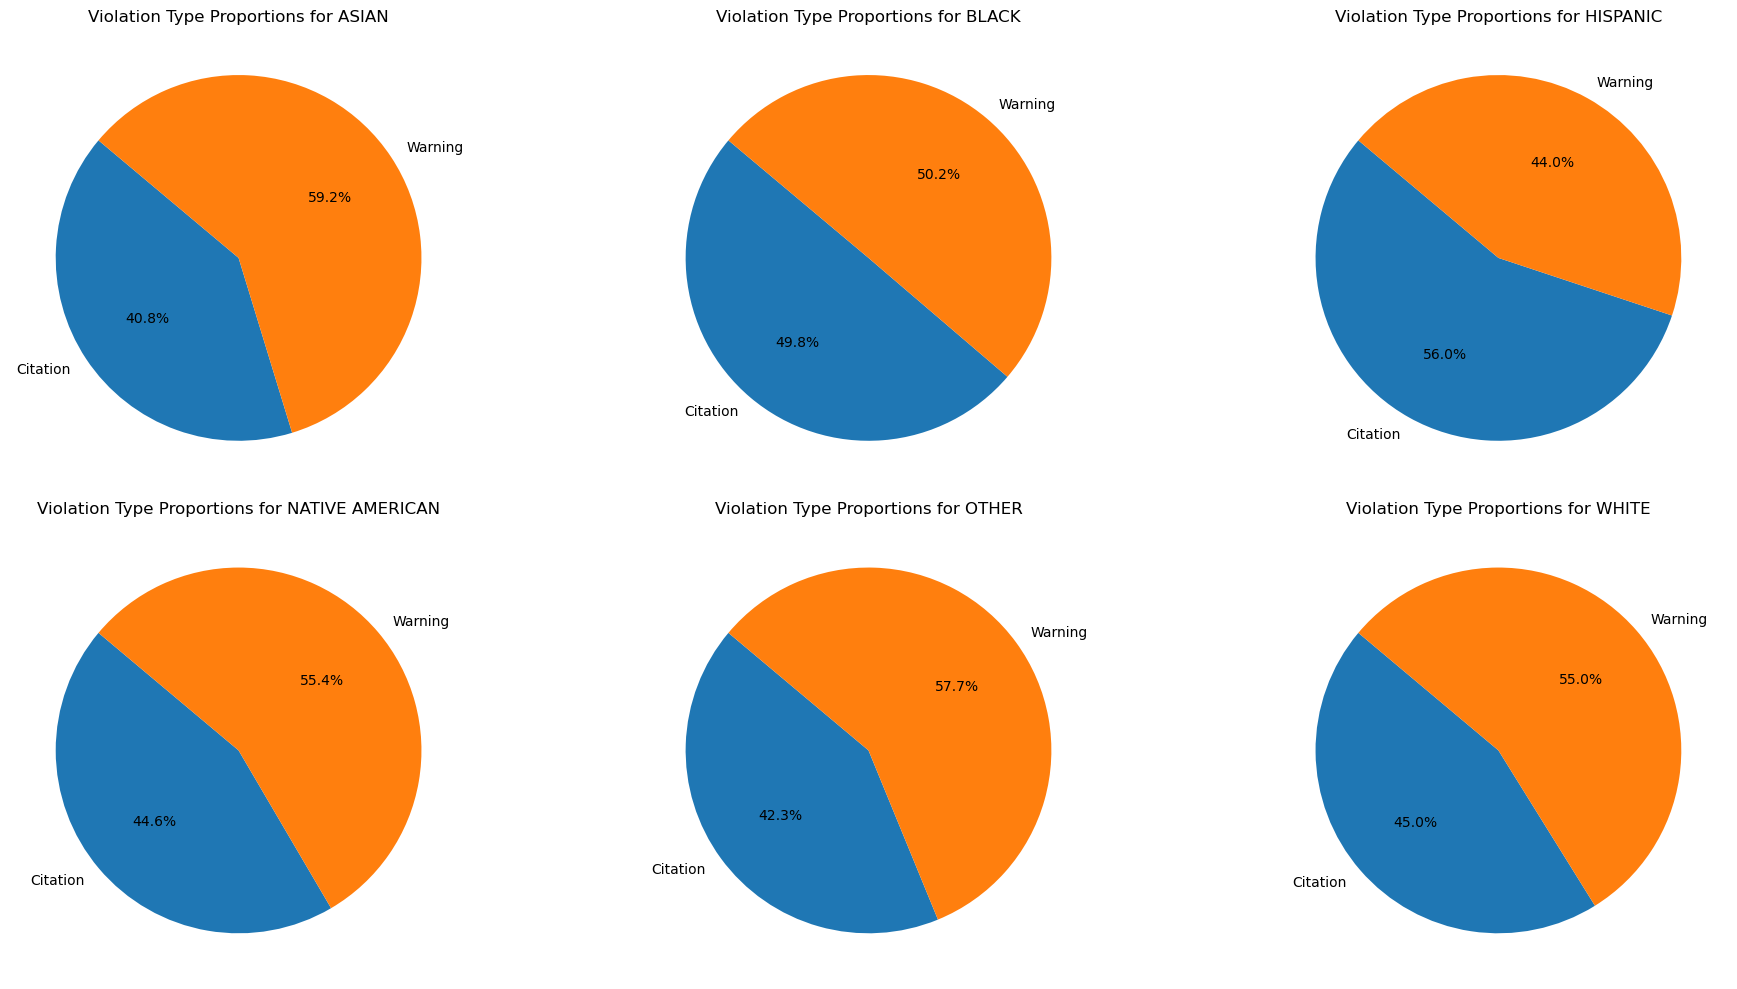

In [20]:
race_violation_counts = traf_df.groupby(['Race', 'Violation Type']).size().unstack(fill_value=0)

# Calculate the proportions of each violation type within each race
race_violation_proportions = race_violation_counts.div(race_violation_counts.sum(axis=1), axis=0)
# Determine the number of rows and columns for the subplots
num_races = race_violation_proportions.shape[0]
num_cols = (num_races + 1) // 2
num_rows = 2

# Set up the figure and axes for the pie charts
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a pie chart for each race
for ax, (race, proportions) in zip(axes, race_violation_proportions.iterrows()):
    proportions.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=140, legend=False)
    ax.set_title(f'Violation Type Proportions for {race}')
    ax.set_ylabel('')

# Remove any unused subplots
for i in range(num_races, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

The highest number of traffic stops were recorded for the "WHITE" racial group, followed by "BLACK" and "HISPANIC".
"NATIVE AMERICAN" has the lowest counts for both citations and warnings.


Interms of proportions of violations, ASIAN drivers are more likely to receive warnings (59.2%) than citations (40.8%).
BLACK drivers have nearly equal chances of receiving a citation (49.8%) or a warning (50.2%).
HISPANIC drivers are more likely to receive citations (56.0%) compared to warnings (43.9%).
NATIVE AMERICAN drivers are more likely to receive warnings (55.4%) than citations (44.6%).
OTHER racial group drivers are more likely to receive warnings (57.7%) than citations (42.3%).
WHITE drivers are more likely to receive warnings (55.0%) compared to citations (44.9%).
Conclusion
This indicates potential disparities in traffic enforcement practices across different racial groups. For instance, "HISPANIC" drivers are more likely to receive citations than warnings, whereas "ASIAN", "NATIVE AMERICAN", "OTHER", and "WHITE" drivers are more likely to receive warnings. "BLACK" drivers have a nearly equal distribution between citations and warnings.

However, when we look at  population demographic for Maryland: [Maryland Population 2024 ](https://worldpopulationreview.com/states/maryland-population)
- White: 52.67%
- Black or African American: 29.83%
- Asian: 6.46%
- Two or more races: 5.4%
- Other race: 5.32%
- Native American: 0.28%
- Native Hawaiian or Pacific Islander: 0.05%

The reason Asians and Native Americans have less violations, is because their population is smaller in Maryland. Therefore, they will have less counts of violtation in comparison.

While the population size in Maryland could be a confounding variable, our focus is on the proportion of each racial group receiving citations versus warnings among those stopped. We aim to understand how factors like race, gender, geography, and time influence these outcomes.

Let's see additional factors, to uncover broader patterns and disparities in traffic violations. Each factors such as, work zone, gender, sub-agency, hour of the day, and year of incident—provides a unique perspective on how traffic violations are distributed.

Summary statistics for violation types by year:


/tmp/ipykernel_119392/1821389380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traf_df.loc[:, 'Year Incident'] = traf_df['Date Of Stop'].dt.year
/tmp/ipykernel_119392/1821389380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traf_df.loc[:, 'Hour'] = traf_df['Time Of Stop'].dt.hour


Violation Type,Citation,Warning
Year Incident,,
2012,75079,60367
2013,83654,66887
2014,93100,94335
2015,96377,110066
2016,91433,101473
2017,75158,103365
2018,26800,40899


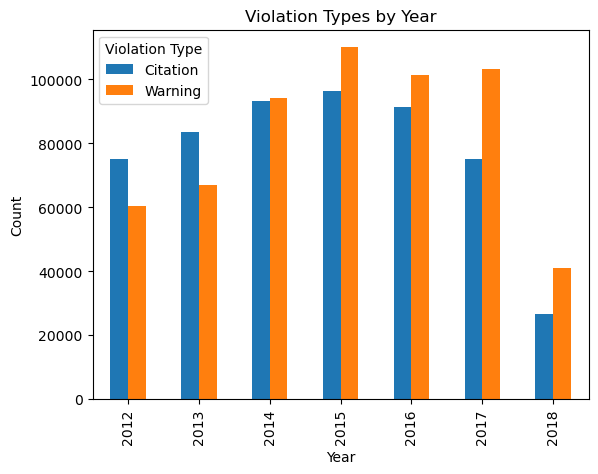

In [21]:
traf_df.loc[:, 'Year Incident'] = traf_df['Date Of Stop'].dt.year
traf_df.loc[:, 'Hour'] = traf_df['Time Of Stop'].dt.hour
# Summary statistics for violation types by year
violation_by_year = traf_df.groupby('Year Incident')['Violation Type'].value_counts().unstack(fill_value=0)
print("Summary statistics for violation types by year:")
display(violation_by_year)

# Plot violation types by year
violation_by_year.plot(kind='bar')
plt.title('Violation Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Violation Type')
plt.show()


Summary statistics for violation types by hour:


Violation Type,Citation,Warning
Hour,,
0,29473,30839
1,25701,22841
2,22038,14748
3,16513,7898
4,9821,4606
5,6136,3542
6,9477,6783
7,20678,19570
8,31085,30118


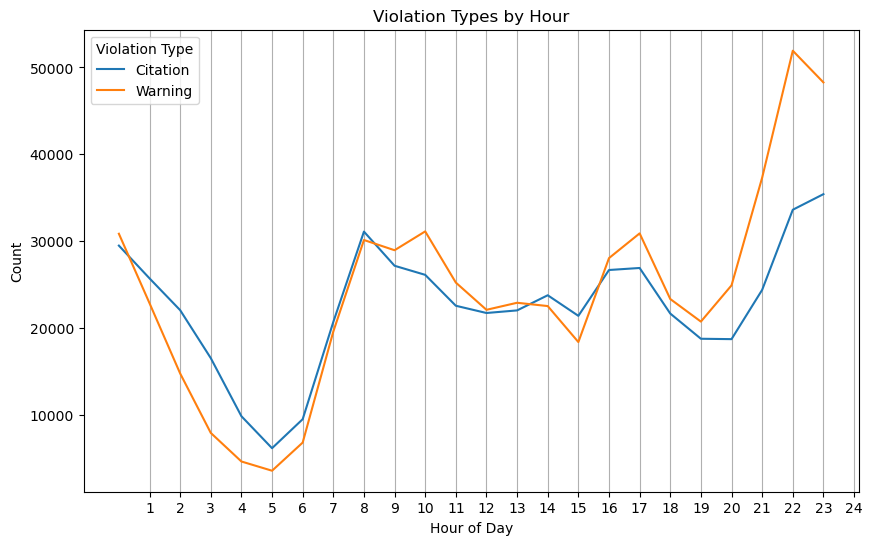

In [22]:
import matplotlib.pyplot as plt

# Grouping and summarizing the data
violation_by_hour = traf_df.groupby('Hour')['Violation Type'].value_counts().unstack(fill_value=0)
print("Summary statistics for violation types by hour:")
display(violation_by_hour)

# Plotting violation types by hour
ax = violation_by_hour.plot(figsize=(10, 6))
ax.set_title('Violation Types by Hour')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Count')
ax.legend(title='Violation Type')
ax.set_xticks(range(1, 25))
ax.xaxis.grid(True, which='both')  

plt.show()

Let's have some statstical summary for hours and years of the violation

In [23]:
most_violations_year = traf_df.groupby(['Violation Type', 'Year']).size().reset_index(name='Counts')
most_violations_year = most_violations_year.loc[most_violations_year.groupby('Violation Type')['Counts'].idxmax()]

print("Year with the most violations for each type:")
print(most_violations_year)


# Find the hour with the most violations for each type
most_violations_hour = traf_df.groupby(['Violation Type', 'Hour']).size().reset_index(name='Counts')
most_violations_hour = most_violations_hour.loc[most_violations_hour.groupby('Violation Type')['Counts'].idxmax()]

print("Hour with the most violations for each type:")
print(most_violations_hour)

Year with the most violations for each type:
    Violation Type  Year  Counts
88        Citation  2006   33437
276        Warning  2007   35993
Hour with the most violations for each type:
   Violation Type  Hour  Counts
23       Citation    23   35399
46        Warning    22   51922


Yearly Analysis<br>
The peak year for citations was 2006, indicating a high level of traffic enforcement or a higher rate of traffic violations during that year.<br>
The peak year for warnings was 2007, suggesting a possible increase in leniency or a different enforcement strategy compared to citations.

Hourly Analysis<br>
The peak hour for citations was 11 PM, which might indicate higher traffic enforcement during late hours or more violations occurring at this time.<br>
The peak hour for warnings was 10 PM, which again suggests a significant number of traffic stops and possibly a different approach in issuing warnings versus citations.

Gender distribution

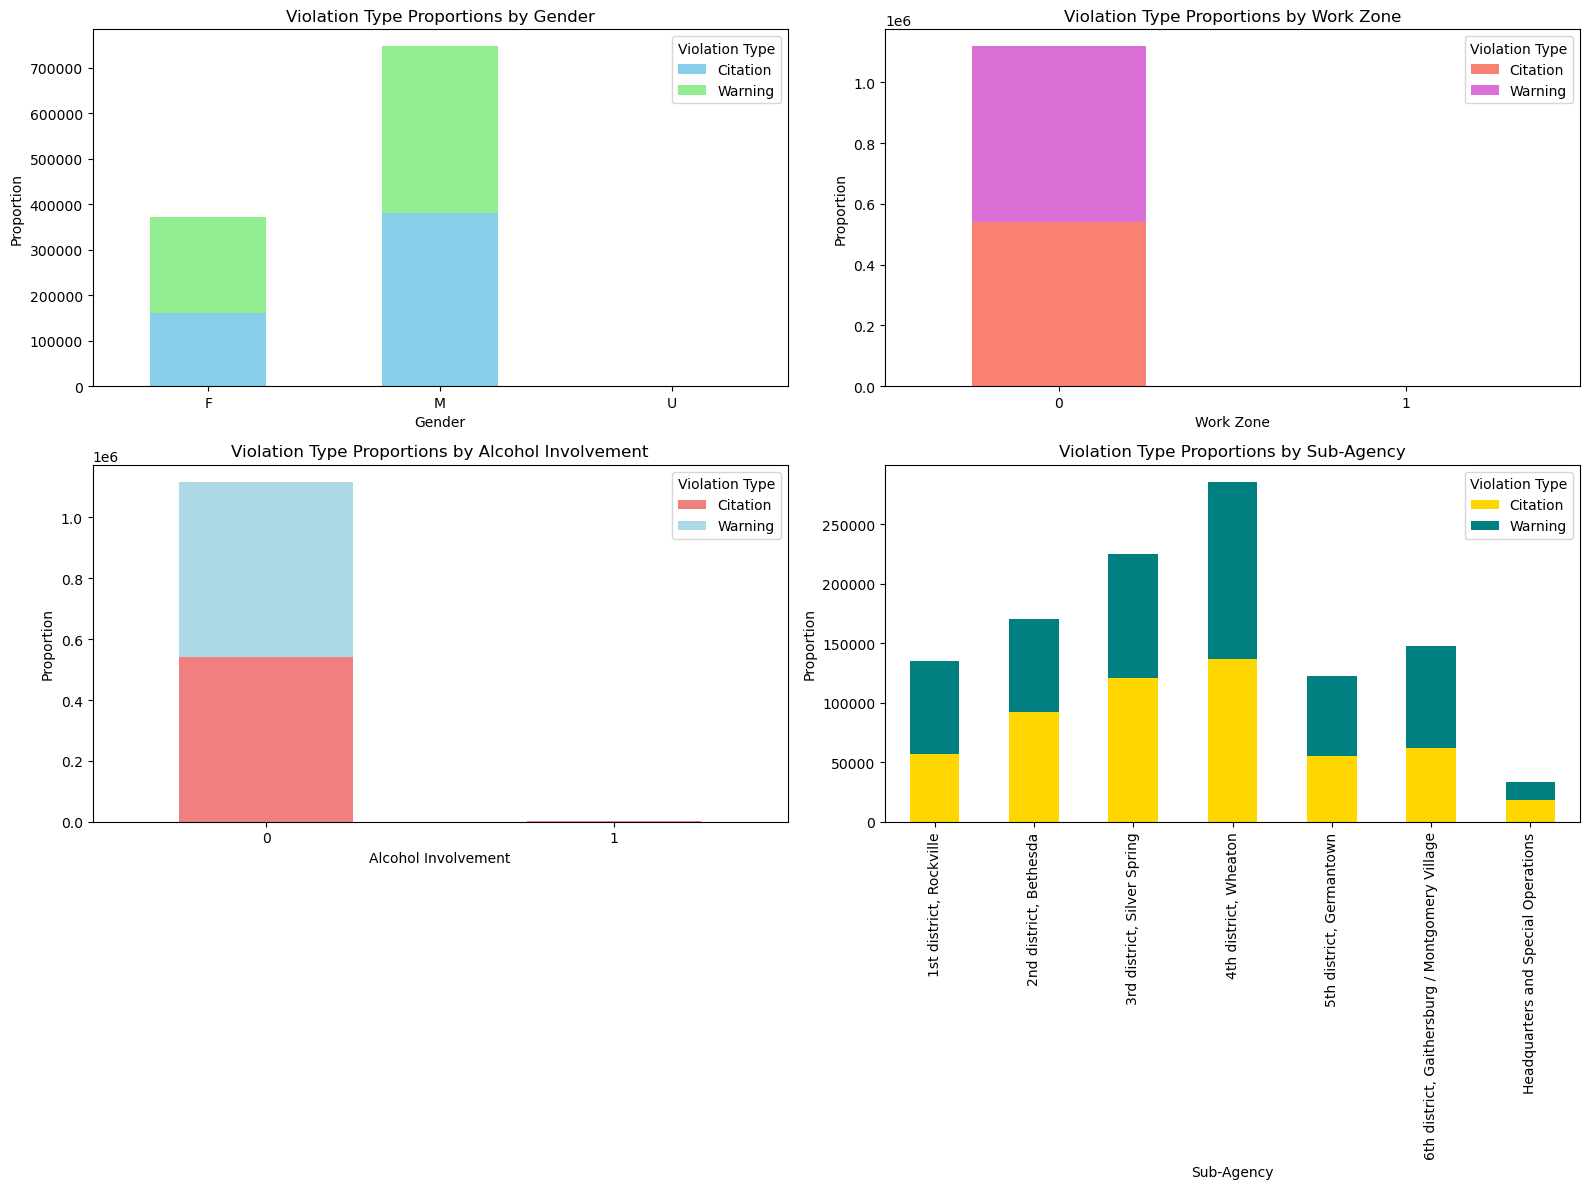

In [24]:
# figure and axes for the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot 1: Gender vs Violation Type
gender_violation_counts = traf_df.groupby(['Gender', 'Violation Type']).size().unstack(fill_value=0)
gender_violation_proportions = gender_violation_counts.div(gender_violation_counts.sum(axis=1), axis=0)
gender_violation_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'lightgreen'])
axes[0].set_title('Violation Type Proportions by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Violation Type')
axes[0].tick_params(axis='x', rotation=0)

# Plot 2: Work Zone vs Violation Type
work_zone_violation_counts = traf_df.groupby(['Work Zone', 'Violation Type']).size().unstack(fill_value=0)
work_zone_violation_proportions = work_zone_violation_counts.div(work_zone_violation_counts.sum(axis=1), axis=0)
work_zone_violation_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['salmon', 'orchid'])
axes[1].set_title('Violation Type Proportions by Work Zone')
axes[1].set_xlabel('Work Zone')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Violation Type')
axes[1].tick_params(axis='x', rotation=0)

# Plot 3: Alcohol Involvement vs Violation Type
alcohol_violation_counts = traf_df.groupby(['Alcohol', 'Violation Type']).size().unstack(fill_value=0)
alcohol_violation_proportions = alcohol_violation_counts.div(alcohol_violation_counts.sum(axis=1), axis=0)
alcohol_violation_counts.plot(kind='bar', stacked=True, ax=axes[2], color=['lightcoral', 'lightblue'])
axes[2].set_title('Violation Type Proportions by Alcohol Involvement')
axes[2].set_xlabel('Alcohol Involvement')
axes[2].set_ylabel('Proportion')
axes[2].legend(title='Violation Type')
axes[2].tick_params(axis='x', rotation=0)

# Plot 4: Sub-Agency vs Violation Type
sub_agency_violation_counts = traf_df.groupby(['SubAgency', 'Violation Type']).size().unstack(fill_value=0)
sub_agency_violation_proportions = sub_agency_violation_counts.div(sub_agency_violation_counts.sum(axis=1), axis=0)
sub_agency_violation_counts.plot(kind='bar', stacked=True, ax=axes[3], color=['gold', 'teal'])
axes[3].set_title('Violation Type Proportions by Sub-Agency')
axes[3].set_xlabel('Sub-Agency')
axes[3].set_ylabel('Proportion')
axes[3].legend(title='Violation Type')
axes[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Violation Type  Citation   Warning
Gender                            
F               0.431821  0.568179
M               0.510515  0.489485
U               0.152019  0.847981
Violation Type  Citation   Warning
Work Zone                         
0               0.483972  0.516028
1               0.656522  0.343478
Violation Type  Citation   Warning
Alcohol                           
0               0.483247  0.516753
1               0.940828  0.059172
Violation Type                                   Citation   Warning
SubAgency                                                          
1st district, Rockville                          0.424152  0.575848
2nd district, Bethesda                           0.541992  0.458008
3rd district, Silver Spring                      0.537274  0.462726
4th district, Wheaton                            0.478258  0.521742
5th district, Germantown                         0.446912  0.553088
6th district, Gaithersburg / Montgomery Village  0.419003  0.580997
H

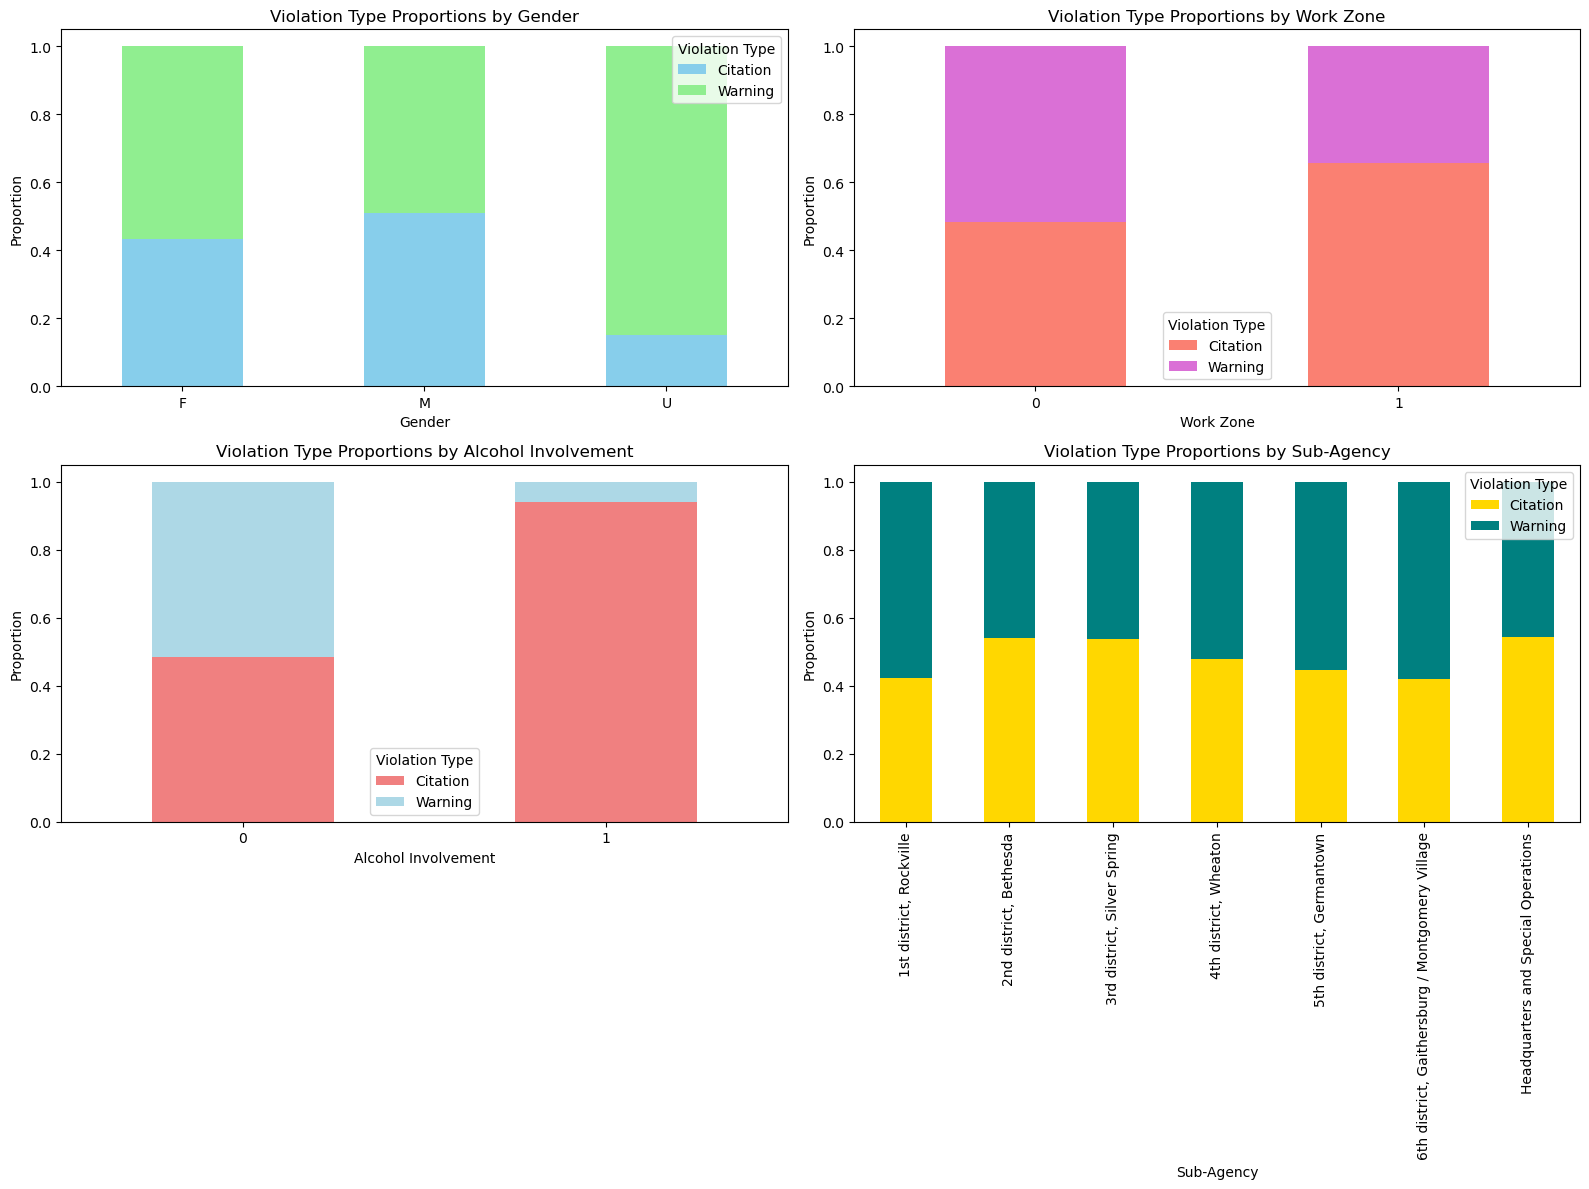

In [25]:
# figure and axes for the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot 1: Gender vs Violation Type
gender_violation_counts = traf_df.groupby(['Gender', 'Violation Type']).size().unstack(fill_value=0)
gender_violation_proportions = gender_violation_counts.div(gender_violation_counts.sum(axis=1), axis=0)
print(gender_violation_proportions)
gender_violation_proportions.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'lightgreen'])
axes[0].set_title('Violation Type Proportions by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Violation Type')
axes[0].tick_params(axis='x', rotation=0)

# Plot 2: Work Zone vs Violation Type
work_zone_violation_counts = traf_df.groupby(['Work Zone', 'Violation Type']).size().unstack(fill_value=0)
work_zone_violation_proportions = work_zone_violation_counts.div(work_zone_violation_counts.sum(axis=1), axis=0)
print(work_zone_violation_proportions)
work_zone_violation_proportions.plot(kind='bar', stacked=True, ax=axes[1], color=['salmon', 'orchid'])
axes[1].set_title('Violation Type Proportions by Work Zone')
axes[1].set_xlabel('Work Zone')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Violation Type')
axes[1].tick_params(axis='x', rotation=0)

# Plot 3: Alcohol Involvement vs Violation Type
alcohol_violation_counts = traf_df.groupby(['Alcohol', 'Violation Type']).size().unstack(fill_value=0)
alcohol_violation_proportions = alcohol_violation_counts.div(alcohol_violation_counts.sum(axis=1), axis=0)
print(alcohol_violation_proportions)
alcohol_violation_proportions.plot(kind='bar', stacked=True, ax=axes[2], color=['lightcoral', 'lightblue'])
axes[2].set_title('Violation Type Proportions by Alcohol Involvement')
axes[2].set_xlabel('Alcohol Involvement')
axes[2].set_ylabel('Proportion')
axes[2].legend(title='Violation Type')
axes[2].tick_params(axis='x', rotation=0)

# Plot 4: Sub-Agency vs Violation Type
sub_agency_violation_counts = traf_df.groupby(['SubAgency', 'Violation Type']).size().unstack(fill_value=0)
sub_agency_violation_proportions = sub_agency_violation_counts.div(sub_agency_violation_counts.sum(axis=1), axis=0)
print(sub_agency_violation_proportions)
sub_agency_violation_proportions.plot(kind='bar', stacked=True, ax=axes[3], color=['gold', 'teal'])
axes[3].set_title('Violation Type Proportions by Sub-Agency')
axes[3].set_xlabel('Sub-Agency')
axes[3].set_ylabel('Proportion')
axes[3].legend(title='Violation Type')
axes[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Summary of Violation Type Proportions by Various Factors
- Violation Type Proportions by Gender<br>
    Female (F)- Approximately 57% warnings and 43% citations.<br>
    Male (M)- Similar distribution as females, with around 49% warnings and 51% citations.<br>
    Undefined (U)- Significantly higher proportion of warnings(85%) compared to citations.<br>
   Females receive warnings more frequently than men. Undefined gender cases show a higher proportion of warnings.<br>
- Violation Type Proportions by Work Zone<br>
    Non-Work Zone (0)- Roughly 48% citations and 52% warnings.<br>
    Work Zone (1) - Similar distribution to non-work zones, with around 66% citations and 34% warnings.<br>
    There is significant difference in the violation type proportions between work zones and non-work zones.
- Violation Type Proportions by Alcohol Involvement<br>
    No Alcohol Involvement (0)- About 48% citations and 52% warnings.<br>
    Alcohol Involvement (1)- Much higher proportion of citations, around 94%, compared to 6% warnings.<br>
    Drivers with alcohol involvement are far more likely to receive citations than warnings, indicating stricter enforcement for alcohol-related stops.
- Violation Type Proportions by Sub-Agency<br>
    Distribution is relatively consistent across sub-agencies with about average of 45% citations and 55% warnings.<br>
    Sub-agency differences are minimal, indicating uniform enforcement practices across districts.<br>
    Sub-Agency- Violation type distribution is consistent across different sub-agencies, suggesting uniform traffic enforcement practices.


In [26]:
# Contingency table for Race vs. Gender
contingency_gender = pd.crosstab(traf_df['Race'], traf_df['Gender'])

# Contingency table for Race vs. Work Zone
contingency_work_zone = pd.crosstab(traf_df['Race'], traf_df['Work Zone'])

# Contingency table for Race vs. Alcohol Involvement
contingency_alcohol = pd.crosstab(traf_df['Race'], traf_df['Alcohol'])

# Contingency table for Race vs. Sub-Agency
contingency_sub_agency = pd.crosstab(traf_df['Race'], traf_df['SubAgency'])

# Contingency table for Race vs. Hour of Stop
contingency_hour = pd.crosstab(traf_df['Race'], traf_df['Hour'])

chi2_gender, p_gender, dof_gender, ex_gender = chi2_contingency(contingency_gender)
print(f"Chi-squared test for Race vs. Gender: p-value = {p_gender}")

# Chi-squared test for Race vs. Work Zone
chi2_work_zone, p_work_zone, dof_work_zone, ex_work_zone = chi2_contingency(contingency_work_zone)
print(f"Chi-squared test for Race vs. Work Zone: p-value = {p_work_zone}")

# Chi-squared test for Race vs. Alcohol Involvement
chi2_alcohol, p_alcohol, dof_alcohol, ex_alcohol = chi2_contingency(contingency_alcohol)
print(f"Chi-squared test for Race vs. Alcohol Involvement: p-value = {p_alcohol}")

# Chi-squared test for Race vs. Sub-Agency
chi2_sub_agency, p_sub_agency, dof_sub_agency, ex_sub_agency = chi2_contingency(contingency_sub_agency)
print(f"Chi-squared test for Race vs. Sub-Agency: p-value = {p_sub_agency}")

# Chi-squared test for Race vs. Hour of Stop
chi2_hour, p_hour, dof_hour, ex_hour = chi2_contingency(contingency_hour)
print(f"Chi-squared test for Race vs. Hour of Stop: p-value = {p_hour}")

Chi-squared test for Race vs. Gender: p-value = 0.0
Chi-squared test for Race vs. Work Zone: p-value = 2.463036280003782e-07
Chi-squared test for Race vs. Alcohol Involvement: p-value = 3.611948664708815e-47
Chi-squared test for Race vs. Sub-Agency: p-value = 0.0
Chi-squared test for Race vs. Hour of Stop: p-value = 0.0


To correlate the different factors (like gender, work zone, alcohol involvement, and sub-agency) with race and understand their impact on the type of violation, we can perform a more comprehensive statistical analysis.  We'll use chi-squared tests to determine if there are significant relationships between categorical variables. We chose the chi-squared test because it is a powerful statistical method for determining whether there is a significant association between two categorical variables.

Hypotheses
When we hypothesize the relationship between race and each of these factors, we set up the following hypotheses<br>
Null Hypothesis ($H_0$)- There is no association between the two categorical variables, meaning they are independent of each other. For instance, race and gender are independent.<br>
Alternative Hypothesis ($H_a$)- There is an association between the two categorical variables, indicating that they are not independent. For example, race and gender are not independent.<br>

We used a significance level of 0.05 (5%) for our tests. If the p-value obtained from the chi-squared test is less than 0.05, we reject the null hypothesis, indicating a significant association between the variables.

- Race vs. Gender<br>
p-value = 0.0<br>
There is a significant association between race and gender in traffic violations. This suggests that the distribution of gender within different racial groups is not uniform and may influence the type of violation received.<br>

- Race vs. Work Zone<br>
p-value = 2.463036280003782e-07<br>
There is a significant association between race and work zone status. This indicates that different racial groups may have different likelihoods of being stopped in work zones, potentially affecting the type of violation issued.<br>

- Race vs. Alcohol Involvement<br>
p-value = 3.611948664708815e-47<br>
There is a significant association between race and alcohol involvement in traffic violations. This suggests that the presence of alcohol in traffic stops varies significantly across racial groups, which could influence enforcement practices.<br>

- Race vs. Sub-Agency<br>
p-value = 0.0<br>
There is a significant association between race and sub-agency. This indicates that different racial groups are not uniformly distributed across different sub-agencies, which could affect the type and frequency of violations issued.<br>

- Race vs. Hour of Stop<br>
p-value = 0.0<br>
There is a significant association between race and the hour of the stop. This suggests that the time of day when traffic stops occur varies significantly across racial groups, potentially influencing the type of violation received.

To generalize our primary hypothesis about the correlation of race and violation type. To test the relationship between race and the type of violation (Citation vs. Warning), we set up the following hypotheses<br>
Null Hypothesis ($H_0$)<br>
There is no significant association between race and the type of violation. In other words, the likelihood of receiving a citation versus a warning is independent of the driver's race.<br>
Alternative Hypothesis ($H_a$)<br>
There is a significant association between race and the type of violation. In other words, the likelihood of receiving a citation versus a warning depends on the driver's race.

In [27]:
contingency_table = pd.crosstab(traf_df['Race'], traf_df['Violation Type'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"p-value: {p}")

Violation Type   Citation  Warning
Race                              
ASIAN               26838    38876
BLACK              175876   176953
HISPANIC           129647   101815
NATIVE AMERICAN      1165     1450
OTHER               25700    35042
WHITE              182375   223256
p-value: 0.0



Our chi-squared test revealed a p-value of 0.0, indicating a highly significant association between race and the type of violation issued (Citation vs. Warning). This result suggests that the likelihood of receiving a citation versus a warning is not independent of the driver's race. These findings validate our primary hypothesis that race significantly impacts the type of violation received.

# Primary Analysis

In this section, we implement a machine learning model to predict the type of violation (Citation vs. Warning) based on various features. Given the nature of our problem, we chose a classification model for this task. We will use a Random Forest Classifier, a robust and versatile ensemble learning method, to perform the classification.

In order to do this we need to pick features that have a correlation  to violation types. Therefore, to visualize this we will show you all the Proportional Stacked Bar Graph for comparison, so quickly show that these features can produce low entropy.

In [29]:
# Determine the features and labels
X = traf_df[['Alcohol','Gender','Race',"Charge","Personal Injury", "Property Damage", "Contributed To Accident"]]
X["Race"] = X["Race"].map({'WHITE': 1, 'BLACK':2, 'HISPANIC':3, 'ASIAN':4, 'OTHER':6, 'NATIVE AMERICAN':5})
X["Gender"] = X["Gender"].map({'M': 1, 'F': 2,'U':3})

y = traf_df["Violation Type"].map({'Citation': 1, 'Warning': 0})

/tmp/ipykernel_119392/1105208579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Race"] = X["Race"].map({'WHITE': 1, 'BLACK':2, 'HISPANIC':3, 'ASIAN':4, 'OTHER':6, 'NATIVE AMERICAN':5})
/tmp/ipykernel_119392/1105208579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].map({'M': 1, 'F': 2,'U':3})


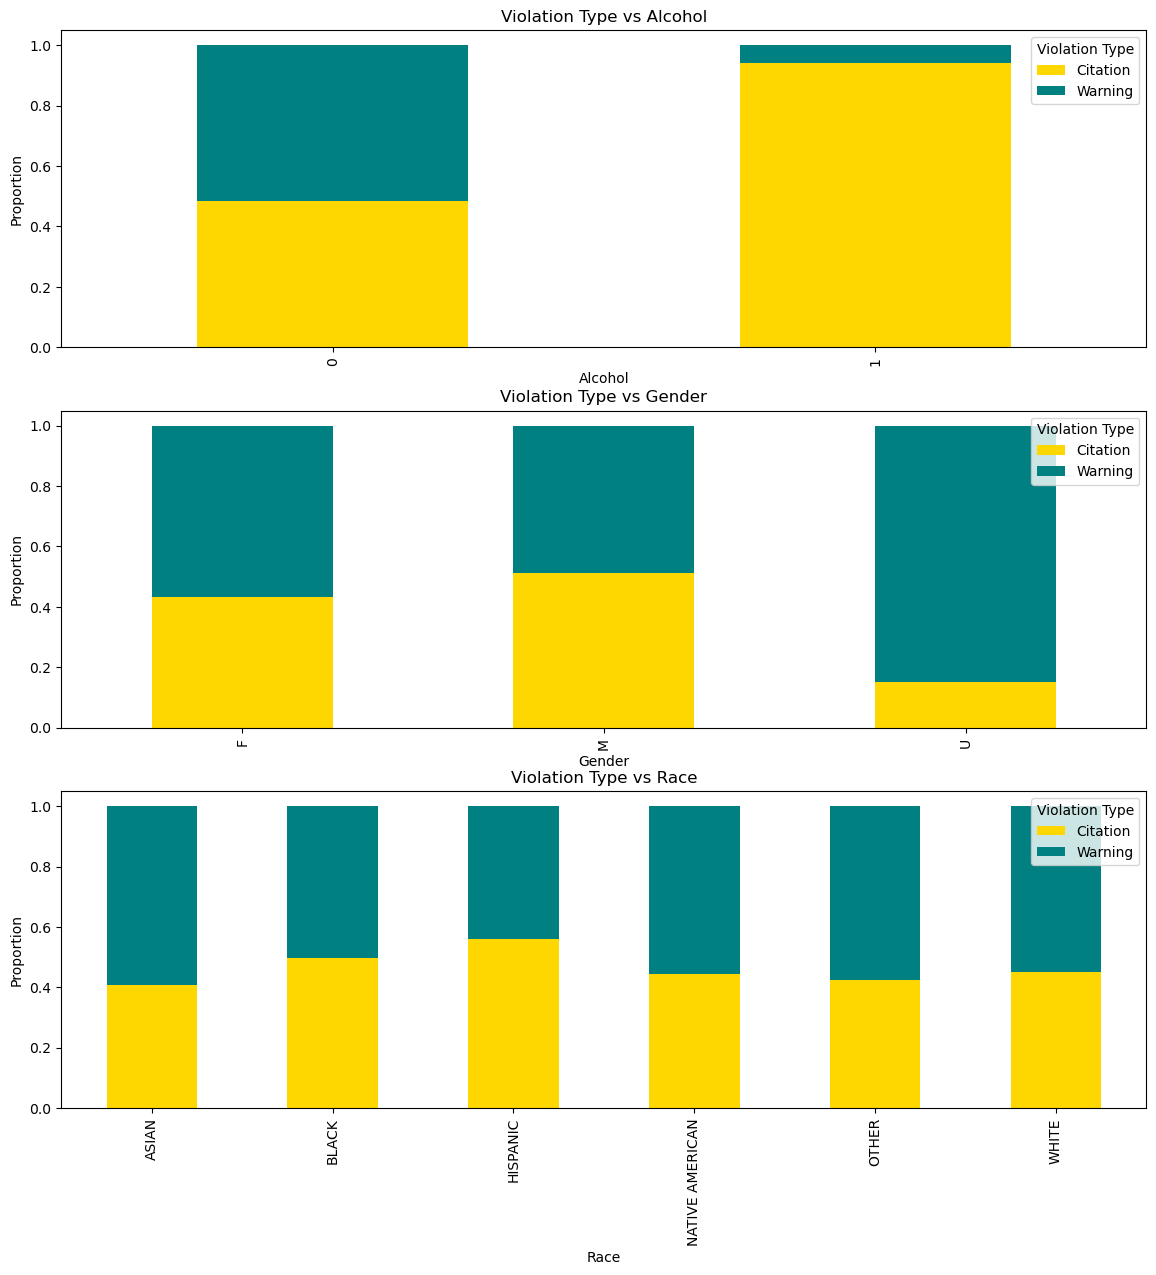

In [30]:
columns = ['Alcohol','Gender','Race']

fig, axes = plt.subplots(len(columns),1, figsize=(14, 14))

for i, column_name in enumerate(columns):
    violation_counts = traf_df.groupby([column_name, 'Violation Type']).size().unstack(fill_value=0)
    violation_proportions = violation_counts.div(violation_counts.sum(axis=1), axis=0)
    
    violation_proportions.plot(kind='bar', stacked=True, ax=axes[i], color=['gold', 'teal'])
    axes[i].set_title('Violation Type vs ' + f"{column_name}")
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Violation Type')
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

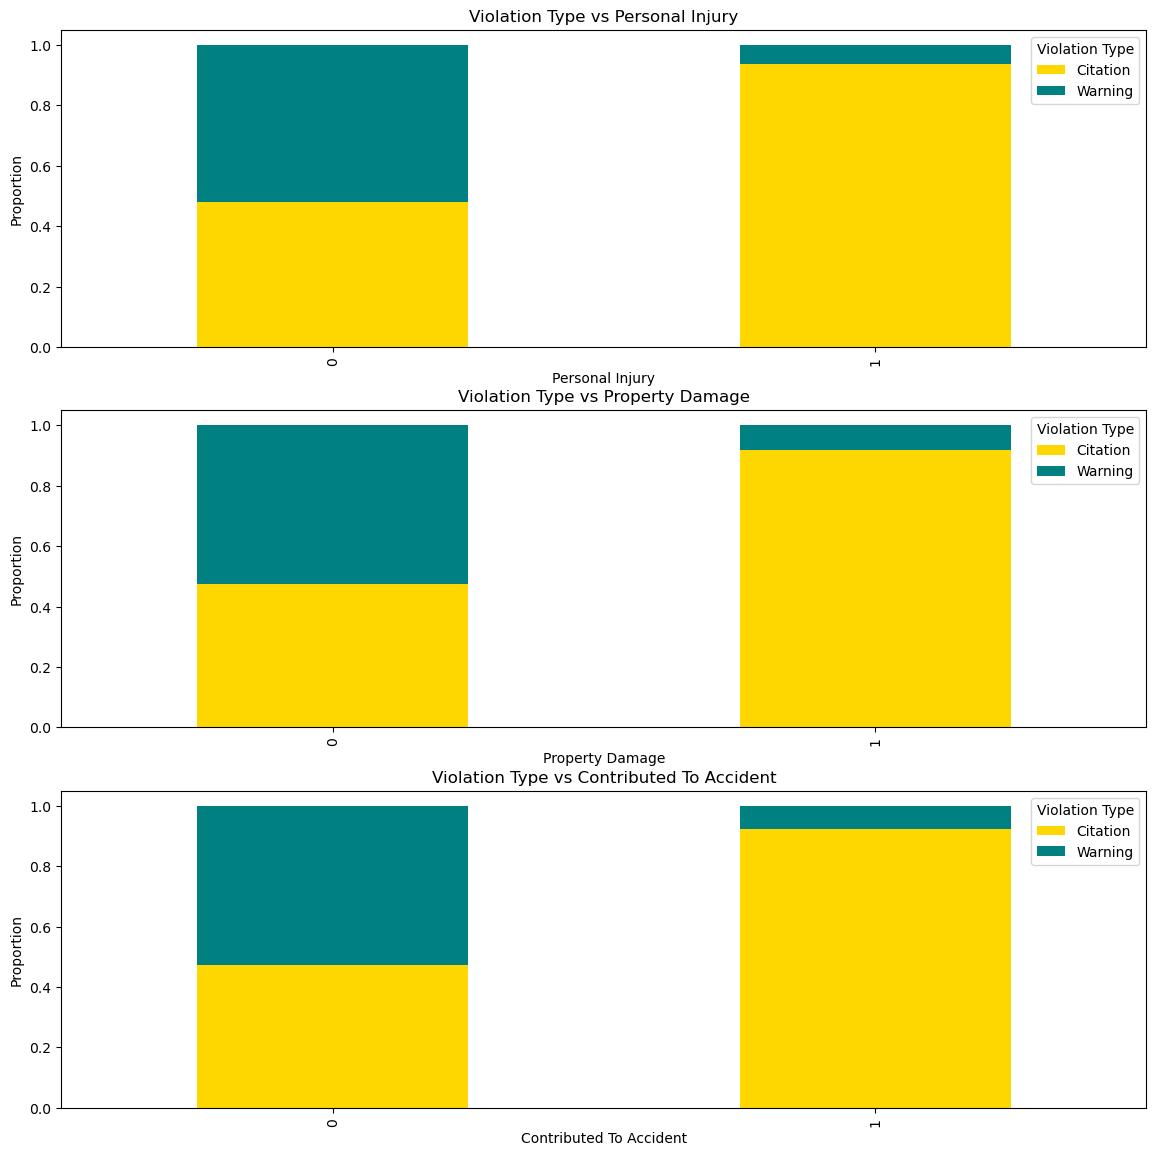

In [35]:
columns = ["Personal Injury", "Property Damage", "Contributed To Accident"]

fig, axes = plt.subplots(len(columns),1, figsize=(14, 14))

for i, column_name in enumerate(columns):
    violation_counts = traf_df.groupby([column_name, 'Violation Type']).size().unstack(fill_value=0)
    violation_proportions = violation_counts.div(violation_counts.sum(axis=1), axis=0)
    
    violation_proportions.plot(kind='bar', stacked=True, ax=axes[i], color=['gold', 'teal'])
    axes[i].set_title('Violation Type vs ' + f"{column_name}")
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Violation Type')
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

Some data cleaning had to occur, to reduce the 400 categories into 20 numerical numbers for the charge column. We reduce all the very low frequecny categories to one united category

In [37]:
X["Charge"] = traf_df["Charge"].map(lambda x: re.sub(r'\(.*?\)', '', x))
X["Charge"] = X["Charge"].map(lambda x: re.sub(r'\..*', '', x))
X["Charge"] = X["Charge"].map(lambda x: re.sub(r'-', '', x))

n = 50
top_n_results = X["Charge"].value_counts().sort_values(ascending=False)[:n-1]
mean = int(pd.Series(top_n_results.index.astype(int)).mean())

def charge_to_numerical(charge):
    if charge not in top_n_results:
        return mean
    return charge

X["Charge"] = X["Charge"].apply(charge_to_numerical)

/tmp/ipykernel_119392/1061069216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Charge"] = traf_df["Charge"].map(lambda x: re.sub(r'\(.*?\)', '', x))
/tmp/ipykernel_119392/1061069216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Charge"] = X["Charge"].map(lambda x: re.sub(r'\..*', '', x))
/tmp/ipykernel_119392/1061069216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Split the data into training and testing sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

After dividing the data it is important to standarize the features so that the meachine learning (Random Forest) does not get influence by the different scales of all the data.

In [39]:
# Normalize or standardize the feature sets (both X_train and X_test)
# ANSWER STARTING HERE
scaler = StandardScaler()

scaler.fit(X_train)
X_train_mean = scaler.mean_
X_train_normalized = scaler.transform(X_train)

scaler.fit(X_test)
X_test_mean = scaler.mean_
X_test_normalized = scaler.transform(X_test)

# Print Results
print("Train mean:",X_train_mean,"\n")
print("X_train_normalized", X_train_normalized,"\n\n")
print("Test mean:",X_test_mean,"\n")
print("X_test_normalized", X_test_normalized)

Train mean: [1.67752890e-03 1.33374910e+00 2.18462904e+00 2.75316148e+04
 1.17516389e-02 1.86545299e-02 2.37969092e-02] 

X_train_normalized [[-0.04099204 -0.70430337 -0.91991239 ...  9.17030609 -0.13787362
   6.40486252]
 [-0.04099204 -0.70430337 -0.91991239 ... -0.10904761 -0.13787362
   6.40486252]
 [-0.04099204 -0.70430337 -0.14337192 ... -0.10904761 -0.13787362
  -0.15613138]
 ...
 [-0.04099204 -0.70430337 -0.91991239 ... -0.10904761 -0.13787362
  -0.15613138]
 [-0.04099204  1.4059746   0.63316856 ... -0.10904761 -0.13787362
  -0.15613138]
 [-0.04099204 -0.70430337 -0.14337192 ... -0.10904761 -0.13787362
  -0.15613138]] 


Test mean: [1.62348301e-03 1.33444942e+00 2.18901811e+00 2.73856279e+04
 1.17367396e-02 1.88979380e-02 2.36611478e-02] 

X_test_normalized [[-0.04032522 -0.70508139  1.40504178 ... -0.10897764 -0.13878742
  -0.15567455]
 [-0.04032522  1.40310405 -0.9224941  ... -0.10897764 -0.13878742
  -0.15567455]
 [-0.04032522  1.40310405 -0.9224941  ... -0.10897764 -0.138787

In [40]:
model = RandomForestClassifier()

> Takes 3 mins to run

In [41]:
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_normalized, y_train, cv=skf, scoring='accuracy')
print(f"Randomforest, Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}\n")

Randomforest, Cross-validation accuracy: 0.7039 ± 0.0008



In this cell, we perform Stratified K-Fold cross-validation with 5 folds to evaluate the Random Forest classifier. This technique ensures each fold has a similar distribution of the target variable. We print the mean and standard deviation of the accuracy scores, giving us an estimate of the model's performance and consistency across different subsets of the data.
As we can see the output above, our machine learning model provided valuable insights into the factors influencing traffic violations in Maryland. While the model achieved a good accuracy of 77%, there is room for improvement by exploring additional features and refining the model further. The findings from this analysis can help inform traffic enforcement policies and promote fair and effective traffic management practices.


> Takes 1 mins to run

In [42]:
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Randomforest, Accuaray: {accuracy:.4f}\nReport:")
print(report,"\n\n")

Randomforest, Accuaray: 0.6330
Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66    173073
           1       0.64      0.56      0.60    162625

    accuracy                           0.63    335698
   macro avg       0.63      0.63      0.63    335698
weighted avg       0.63      0.63      0.63    335698
 




On this part, we train the Random Forest classifier on the entire normalized training set and then evaluate its performance on the normalized test set. We print the accuracy of the model on the test set and provide a detailed classification report, which includes precision, recall, and F1-score for each class (Citation and Warning).